In [1]:
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import scipy.special as spsp
import scipy.misc as spm
import scipy.optimize as spo
import numpy.linalg as npl
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
%matplotlib inline
import sympy as sym
import time
import seaborn as sns
import seaborn.distributions as snsd
import math as math
sns.set(style="ticks");
plt.ioff() # turn off interactive plotting
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22
plt.rc('axes', labelsize=22)
plt.rc('legend', fontsize=22)
mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True
npr.seed(1)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
def plotResults(S, ns, algoName="doesNotMatter", weights="doesNotMatter", figId="basic"):  
    # Plot the joint
    m = np.min(S[:,0])
    M = np.max(S[:,0])
    m_ref = np.min(S_ref[:,0])
    M_ref = np.max(S_ref[:,0])
    
    xlimInf = min(m, m_ref)
    xlimSup = max(M, M_ref)
    xPlot = np.linspace(xlimInf, xlimSup, 1000)
    m = np.min(np.exp(S[:,1]))
    M = np.max(np.exp(S[:,1]))
    m_ref = np.min(np.exp(S_ref[:,1]))
    M_ref = np.max(np.exp(S_ref[:,1]))
    ylimInf = min(m, m_ref)
    ylimSup = max(M, M_ref)
    yPlot = np.linspace(ylimInf, ylimSup, 1000)
    g = sns.jointplot(S[:,0], np.exp(S[:,1]), kind="hex", space=0,size=10, xlim=(xlimInf,xlimSup), ylim=(ylimInf,ylimSup), stat_func=None, marginal_kws={"norm_hist":True}) # 
    plt.sca(g.ax_joint)
    plt.xlabel("$\mu$",)
    plt.ylabel("$\sigma$")

    # Refrence green line
    sns.kdeplot(S_ref[:,0], np.exp(S_ref[:,1]), ax=g.ax_joint, bw="silverman", cmap="BuGn_r", linewidth=5)
    g.ax_marg_x.plot(xPlot, marg0(xPlot), 'g', linewidth=6, label="Ref")
    g.ax_marg_y.plot(marg1(yPlot), yPlot, 'g', linewidth=6)
    
    g.ax_marg_x.legend()
    plt.show()

#Toy data

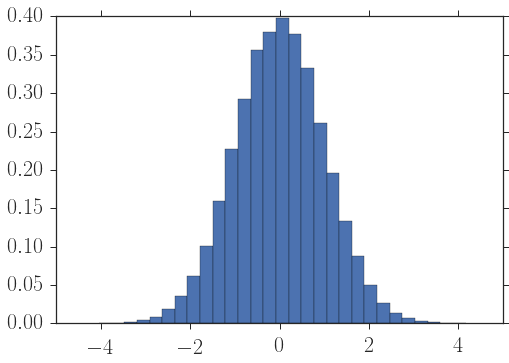

Mean of x = 0.00525302848968
Std of x = 0.998329273542


In [4]:
# Generate data
npr.seed(1)
N = 100000
dataType = "Gaussian"
#dataType = "logNormal"
x = npr.randn(N)

plt.clf()
plt.hist(x, 30, normed=True)
plt.show()

# We store the mean and std deviation for later reference, they are also the MAP and MLE estimates in this case.
realMean = np.mean(x)
realStd = np.std(x)
print "Mean of x =", realMean
print "Std of x =", realStd

#RWMH

In [5]:
def getLogLhd(x, mu, sigma):
    return -(x-mu)**2/(2*asigma**2) - np.log(sigma)

In [19]:
def RWMH(T, mean):
    theta = np.array([mean,np.log(realStd)])
    stepsize = .5/np.sqrt(N)
    S = np.zeros((T, 2))
    acceptance = 0.0
    for i in range(T):
        accepted = 0
        done = 0
        thetaNew = theta
        thetaP = theta + stepsize*npr.randn(2)
        u = npr.rand()
        ratio = getLogLhd(x, thetaP[0], np.exp(thetaP[1])) - getLogLhd(x, theta[0], np.exp(theta[1]))
        Lambda = np.mean(ratio)
        psi = 1./N*np.log(u)
        if Lambda>psi:
            thetaNew = thetaP
            theta = thetaP
            accepted = 1
            S[i,:] = thetaNew
        else:
            S[i,:] = theta
            
        if i<T/10:
            # Perform some adaptation of the stepsize in the early iterations
            stepsize *= np.exp(1./(i+1)**0.6*(accepted-0.5))
        
        acceptance*=i
        acceptance+=accepted
        acceptance/=(i+1)
        if np.mod(i,T/10)==0:
            print "Iteration", i, "Acceptance", acceptance
            
    return S

In [6]:
S_ref = RWMH(50000)
marg0 = sps.gaussian_kde(S_ref[:,0])
marg1 = sps.gaussian_kde(np.exp(S_ref[:,1]))

Iteration 0 Acceptance 0.0
Iteration 5000 Acceptance 0.498900219956
Iteration 10000 Acceptance 0.505249475052
Iteration 15000 Acceptance 0.509499366709
Iteration 20000 Acceptance 0.513974301285
Iteration 25000 Acceptance 0.514499420023
Iteration 30000 Acceptance 0.51401619946
Iteration 35000 Acceptance 0.514328162053
Iteration 40000 Acceptance 0.514412139697
Iteration 45000 Acceptance 0.515877424946


In [7]:
S_ref

array([[ 0.00525303, -0.00167212],
       [ 0.00533631, -0.00209503],
       [ 0.00542153, -0.0012197 ],
       ..., 
       [ 0.00539931, -0.00300287],
       [ 0.00528459, -0.00425893],
       [ 0.00528459, -0.00425893]])

In [18]:
S = RWMH(10000)

Iteration 0 Acceptance 1.0
Iteration 1000 Acceptance 0.501498501499
Iteration 2000 Acceptance 0.495752123938
Iteration 3000 Acceptance 0.484171942686
Iteration 4000 Acceptance 0.486378405399
Iteration 5000 Acceptance 0.487102579484
Iteration 6000 Acceptance 0.487252124646
Iteration 7000 Acceptance 0.48807313241
Iteration 8000 Acceptance 0.487314085739
Iteration 9000 Acceptance 0.484723919564


In [7]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from label_lines import *

%matplotlib inline

In [24]:
niters = 10000
samples_rwmh = [RWMH(niters, mean) for mean in np.arange(0.1, 4, 1)]

Iteration 0 Acceptance 1.0
Iteration 1000 Acceptance 0.4995004995
Iteration 2000 Acceptance 0.516741629185
Iteration 3000 Acceptance 0.520493168944
Iteration 4000 Acceptance 0.518870282429
Iteration 5000 Acceptance 0.513897220556
Iteration 6000 Acceptance 0.511414764206
Iteration 7000 Acceptance 0.506784745036
Iteration 8000 Acceptance 0.505436820397
Iteration 9000 Acceptance 0.502166425953
Iteration 0 Acceptance 1.0
Iteration 1000 Acceptance 0.477522477522
Iteration 2000 Acceptance 0.491754122939
Iteration 3000 Acceptance 0.503498833722
Iteration 4000 Acceptance 0.534616345914
Iteration 5000 Acceptance 0.596080783843
Iteration 6000 Acceptance 0.641226462256
Iteration 7000 Acceptance 0.670047136123
Iteration 8000 Acceptance 0.692163479565
Iteration 9000 Acceptance 0.710254416176
Iteration 0 Acceptance 1.0
Iteration 1000 Acceptance 0.485514485514
Iteration 2000 Acceptance 0.497251374313
Iteration 3000 Acceptance 0.506164611796
Iteration 4000 Acceptance 0.516370907273
Iteration 5000 Acce

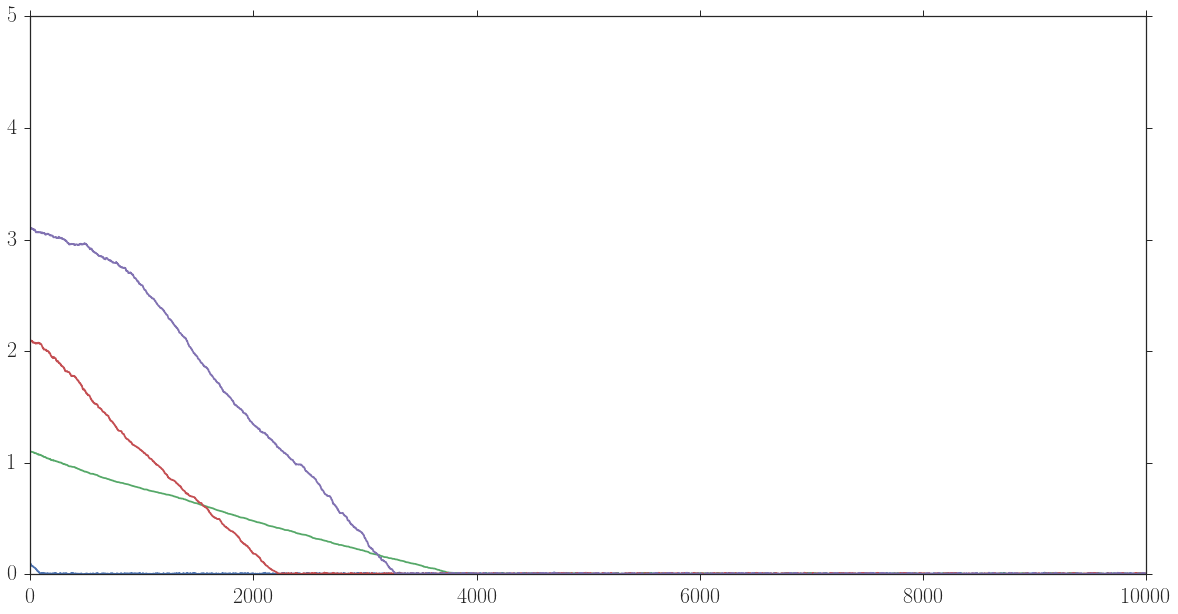

In [26]:
plt.figure(figsize=(20,10))
for samples in samples_rwmh:
    plt.plot(samples[:,0], '-')
plt.xlim([0, niters])
plt.ylim([0, 5]);

In [10]:
S = RWMH(10000)

Iteration 0 Acceptance 1.0
Iteration 1000 Acceptance 0.497502497502
Iteration 2000 Acceptance 0.519740129935
Iteration 3000 Acceptance 0.526157947351
Iteration 4000 Acceptance 0.530617345664
Iteration 5000 Acceptance 0.534893021396
Iteration 6000 Acceptance 0.536910514914
Iteration 7000 Acceptance 0.536637623197
Iteration 8000 Acceptance 0.537057867767
Iteration 9000 Acceptance 0.537495833796


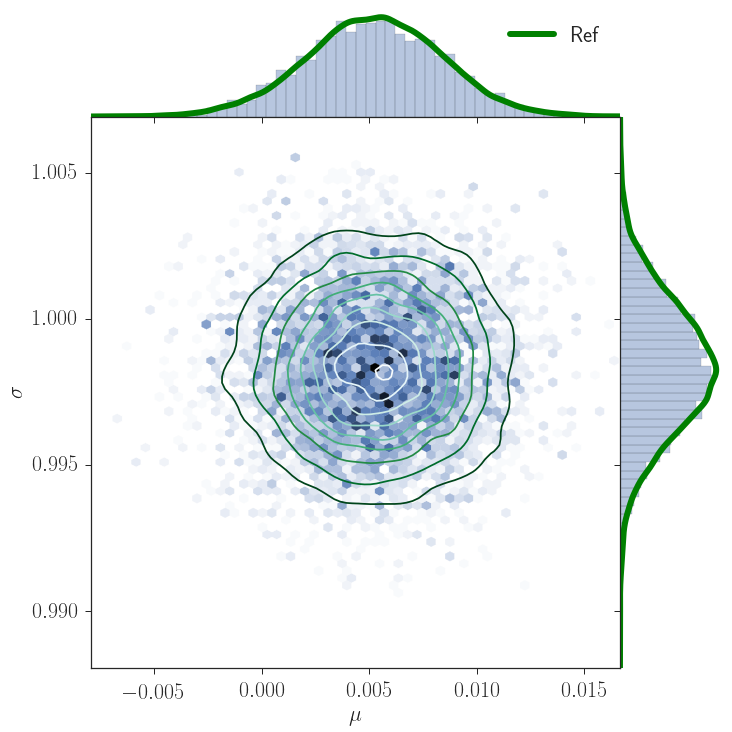

In [14]:
plotResults(S, [], algoName="RWMH")

#Langevin

In [27]:
Gradient = lambda x_float, mu_float, sigma_float:np.array([-(2*mu_float - 2*x_float)/(2*sigma_float**2), -1/sigma_float + (-mu_float + x_float)**2/sigma_float**3]).T
Hessian = lambda x_float, mu_float, sigma_float:[[-1/sigma_float**2*np.ones(x_float.shape), 2*(mu_float - x_float)/sigma_float**3], [2*(mu_float - x_float)/sigma_float**3, (1 - 3*(mu_float - x_float)**2/sigma_float**2)/sigma_float**2]]

In [30]:
def langevin(T,mean):
    theta = np.array([mean, np.log(realStd)])
    S = np.zeros((T,2))
    ns = []
    M = N/10. # Size of the subsample
    weights = np.zeros((T,))
    
    for i in range(T):
        stepsize = .1/N/((i+1)**.33)
        weights[i] = stepsize
        inds = npr.randint(0,N,size=M)
        gradEstimate = N/M*np.sum(Gradient(x[inds], theta[0], np.exp(theta[1])), 0)
        theta[0] = theta[0] + stepsize*gradEstimate[0] + np.sqrt(stepsize)*npr.randn()
        theta[1] = np.log(np.exp(theta[1]) + stepsize*gradEstimate[1] + np.sqrt(stepsize)*npr.randn())
        ns.append(M)
        S[i,:] = theta
        if np.mod(i,T/10)==0:
            print "Iteration", i
            
    return S

In [13]:
S_L, ns_L, weights = langevin(10000)

Iteration 0
Iteration 1000
Iteration 2000
Iteration 3000
Iteration 4000
Iteration 5000
Iteration 6000
Iteration 7000
Iteration 8000
Iteration 9000


In [31]:
niters = 10000
samples_ula = [langevin(niters, mean) for mean in np.arange(0.1, 4, 1)]

Iteration 0
Iteration 1000
Iteration 2000
Iteration 3000
Iteration 4000
Iteration 5000
Iteration 6000
Iteration 7000
Iteration 8000
Iteration 9000
Iteration 0
Iteration 1000
Iteration 2000
Iteration 3000
Iteration 4000
Iteration 5000
Iteration 6000
Iteration 7000
Iteration 8000
Iteration 9000
Iteration 0
Iteration 1000
Iteration 2000
Iteration 3000
Iteration 4000
Iteration 5000
Iteration 6000
Iteration 7000
Iteration 8000
Iteration 9000
Iteration 0
Iteration 1000
Iteration 2000
Iteration 3000
Iteration 4000
Iteration 5000
Iteration 6000
Iteration 7000
Iteration 8000
Iteration 9000


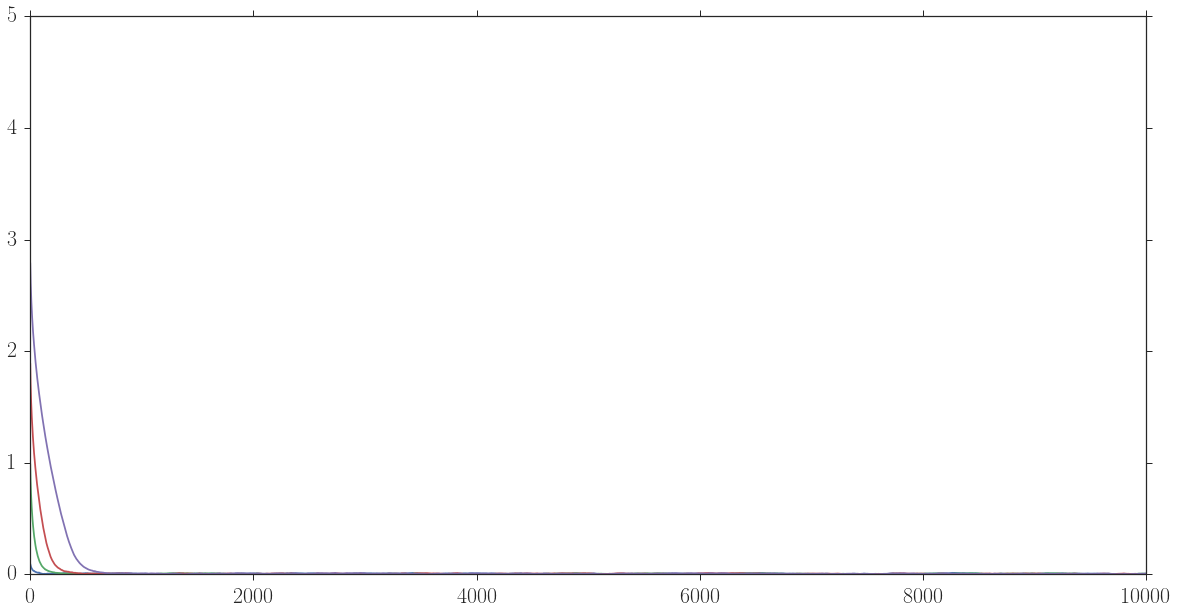

In [32]:
plt.figure(figsize=(20,10))
for samples in samples_ula:
    plt.plot(samples[:,0], '-')
plt.xlim([0, niters])
plt.ylim([0, 5]);

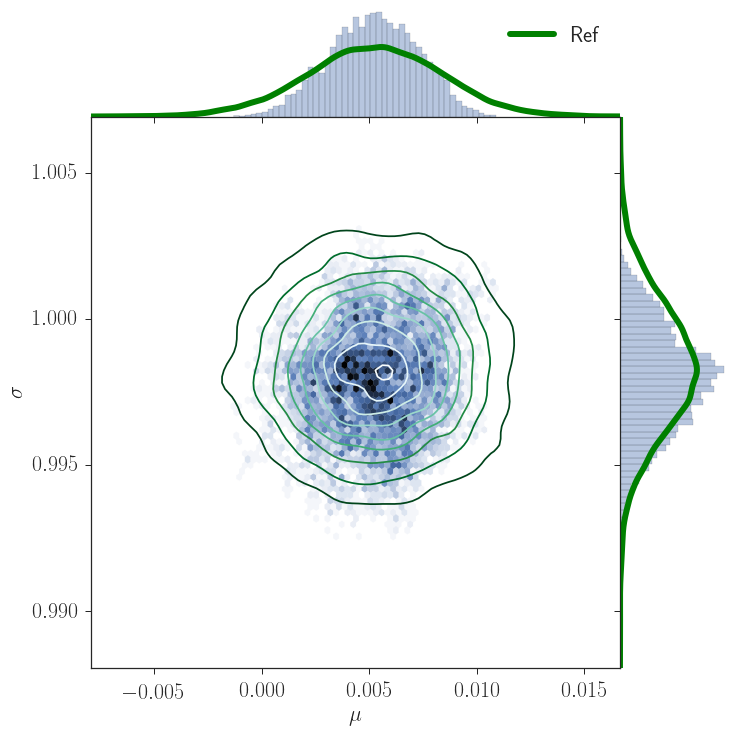

In [38]:
plotResults(S_L, ns_L, algoName="langevin", weights=weights)

#MALA

In [33]:
def mala(T,mean):
    theta = np.array([mean, np.log(realStd)])
    thetaP = np.array([mean, np.log(realStd)])
    S = np.zeros((T,2))
    acceptance = 0.0
    ns = []
    M = N/10. # Size of the subsample
    weights = np.zeros((T,))
    
    for i in range(T):
        accepted = 0
        stepsize = .1/N/((i+1)**.33)
        weights[i] = stepsize
        inds = npr.randint(0,N,size=M)
        gradEstimate = N/M*np.sum(Gradient(x[inds], theta[0], np.exp(theta[1])), 0)
        #print gradEstimate
        thetaP[0] = theta[0] + stepsize*gradEstimate[0] + np.sqrt(stepsize)*npr.randn()
        thetaP[1] = np.log(np.exp(theta[1]) + stepsize*gradEstimate[1] + np.sqrt(stepsize)*npr.randn())
        ns.append(M)
        u = npr.rand()
        ratio = getLogLhd(x, thetaP[0], np.exp(thetaP[1])) - getLogLhd(x, theta[0], np.exp(theta[1]))
        Lambda = np.mean(ratio)
        psi = 1./N*np.log(u)
        if Lambda>psi:
            thetaNew = thetaP
            theta = thetaP
            accepted = 1
            S[i,:] = thetaNew
        else:
            S[i,:] = theta
        
        acceptance*=i
        acceptance+=accepted
        acceptance/=(i+1)
        if np.mod(i,T/10)==0:
            print "Iteration", i, "Acceptance", acceptance
            
    return S

In [35]:
S_M, ns_M, weights_M = mala(10000)

Iteration 0 Acceptance 0.0
Iteration 1000 Acceptance 0.998001998002
Iteration 2000 Acceptance 0.99900049975
Iteration 3000 Acceptance 0.999333555482
Iteration 4000 Acceptance 0.999500124969
Iteration 5000 Acceptance 0.999600079984
Iteration 6000 Acceptance 0.999666722213
Iteration 7000 Acceptance 0.999714326525
Iteration 8000 Acceptance 0.999750031246
Iteration 9000 Acceptance 0.999777802466


In [34]:
niters = 10000
samples_mala = [mala(niters, mean) for mean in np.arange(0.1, 4, 1)]

Iteration 0 Acceptance 1.0
Iteration 1000 Acceptance 1.0
Iteration 2000 Acceptance 1.0
Iteration 3000 Acceptance 1.0
Iteration 4000 Acceptance 1.0
Iteration 5000 Acceptance 1.0
Iteration 6000 Acceptance 1.0
Iteration 7000 Acceptance 1.0
Iteration 8000 Acceptance 1.0
Iteration 9000 Acceptance 1.0
Iteration 0 Acceptance 1.0
Iteration 1000 Acceptance 1.0
Iteration 2000 Acceptance 1.0
Iteration 3000 Acceptance 1.0
Iteration 4000 Acceptance 1.0
Iteration 5000 Acceptance 1.0
Iteration 6000 Acceptance 1.0
Iteration 7000 Acceptance 1.0
Iteration 8000 Acceptance 1.0
Iteration 9000 Acceptance 1.0
Iteration 0 Acceptance 1.0
Iteration 1000 Acceptance 1.0
Iteration 2000 Acceptance 1.0
Iteration 3000 Acceptance 1.0
Iteration 4000 Acceptance 1.0
Iteration 5000 Acceptance 1.0
Iteration 6000 Acceptance 1.0
Iteration 7000 Acceptance 1.0
Iteration 8000 Acceptance 1.0
Iteration 9000 Acceptance 1.0
Iteration 0 Acceptance 1.0
Iteration 1000 Acceptance 1.0
Iteration 2000 Acceptance 1.0
Iteration 3000 Accepta

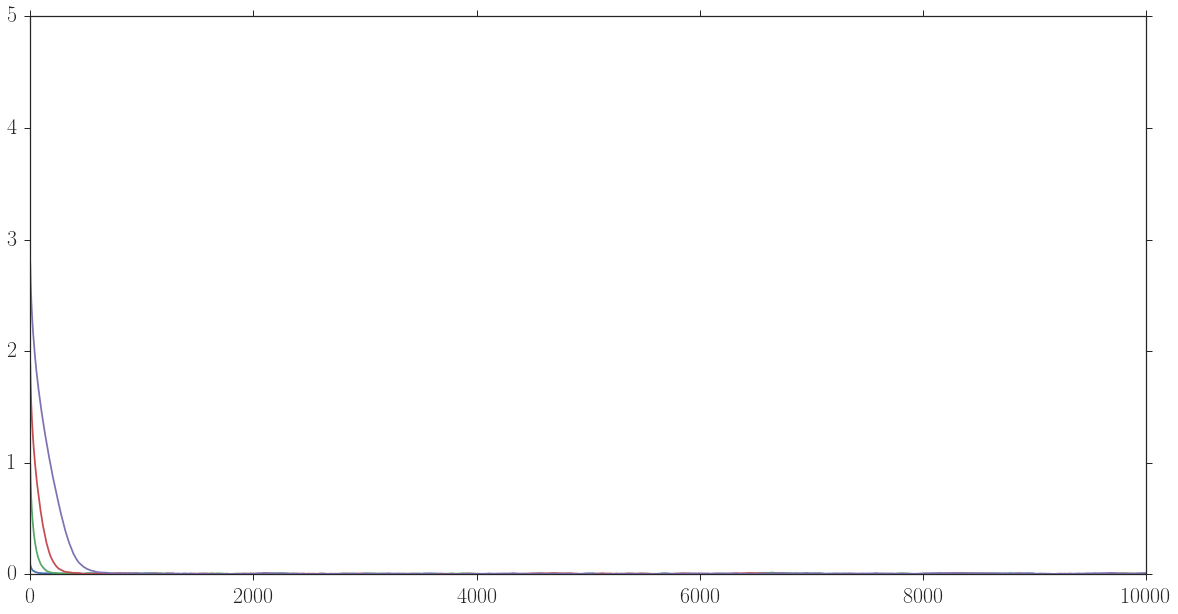

In [35]:
plt.figure(figsize=(20,10))
for samples in samples_mala:
    plt.plot(samples[:,0], '-')
plt.xlim([0, niters])
plt.ylim([0, 5]);

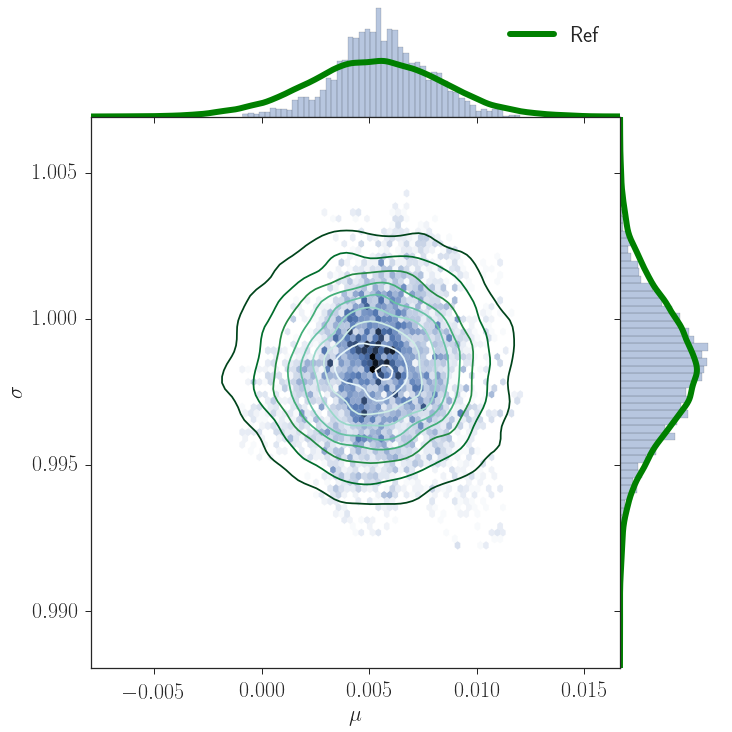

In [36]:
plotResults(S_M, ns_M, algoName="mala", weights=weights_M)

#ULA with generic stepsize (D matrix)

In [13]:
def langevin_d(T):
    theta = np.array([realMean, np.log(realStd)])
    S = np.zeros((T,2))
    ns = []
    M = N/10. # Size of the subsample
    weights = np.zeros((T,))
    
    for i in range(T):
        #stepsize = .1/N/((i+1)**.33)
        weights[i] = stepsize
        inds = npr.randint(0,N,size=M)
        gradEstimate = N/M*np.sum(Gradient(x[inds], theta[0], np.exp(theta[1])), 0)
        stepsize = 1/
        theta[0] = theta[0] + stepsize*gradEstimate[0] + np.sqrt(2*stepsize)*npr.randn()
        theta[1] = np.log(np.exp(theta[1]) + stepsize*gradEstimate[1] + np.sqrt(stepsize)*npr.randn())
        ns.append(M)
        S[i,:] = theta
        if np.mod(i,T/10)==0:
            print "Iteration", i
            
    return S, ns, weights 

In [ ]:
S_L, ns_L, weights = langevin(10000)

In [ ]:
plotResults(S_L, ns_L, algoName="langevin", weights=weights)

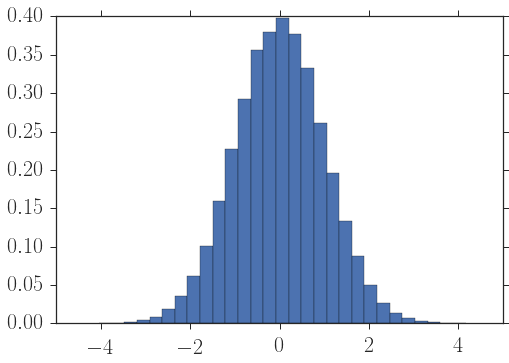

Mean of x = 0.00525302848968
Std of x = 0.998329273542
Reference
Iteration 0 Acceptance 0.0
Iteration 5000 Acceptance 0.498900219956
Iteration 10000 Acceptance 0.505249475052
Iteration 15000 Acceptance 0.509499366709
Iteration 20000 Acceptance 0.513974301285
Iteration 25000 Acceptance 0.514499420023
Iteration 30000 Acceptance 0.51401619946
Iteration 35000 Acceptance 0.514328162053
Iteration 40000 Acceptance 0.514412139697
Iteration 45000 Acceptance 0.515877424946
RWMH
Iteration 0 Acceptance 1.0
Iteration 1000 Acceptance 0.497502497502
Iteration 2000 Acceptance 0.519740129935
Iteration 3000 Acceptance 0.526157947351
Iteration 4000 Acceptance 0.530617345664
Iteration 5000 Acceptance 0.534893021396
Iteration 6000 Acceptance 0.536910514914
Iteration 7000 Acceptance 0.536637623197
Iteration 8000 Acceptance 0.537057867767
Iteration 9000 Acceptance 0.537495833796
Langevin
Iteration 0
Iteration 1000
Iteration 2000
Iteration 3000
Iteration 4000
Iteration 5000
Iteration 6000
Iteration 7000
Itera

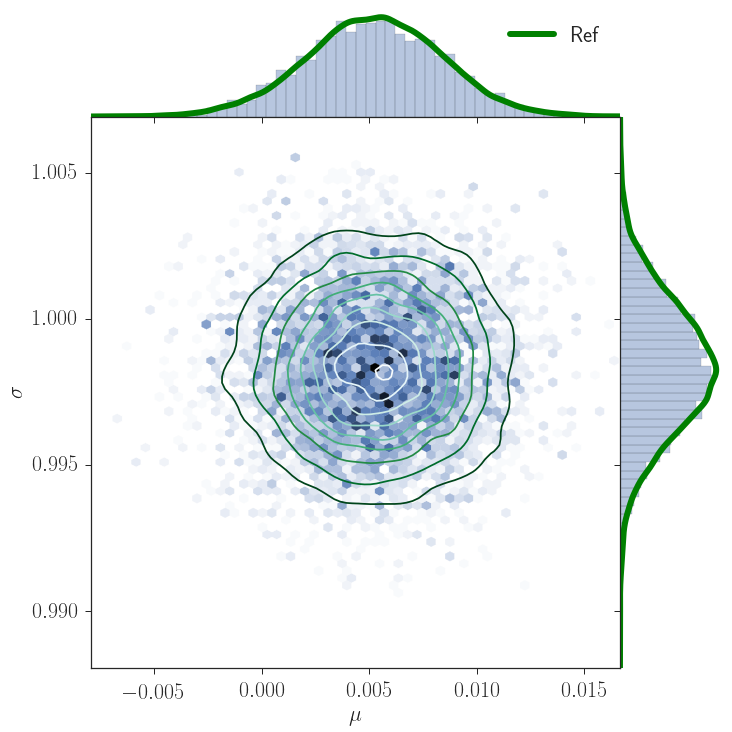

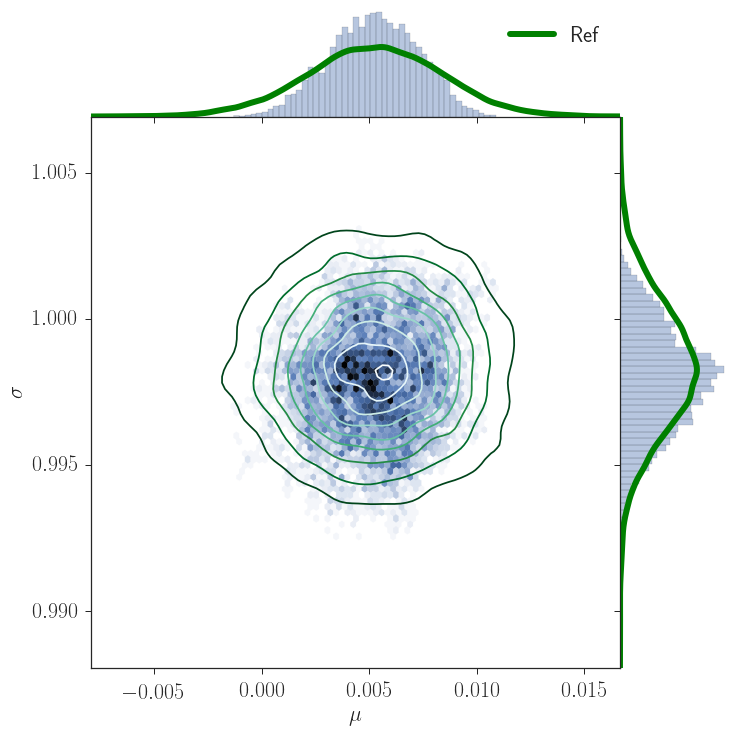

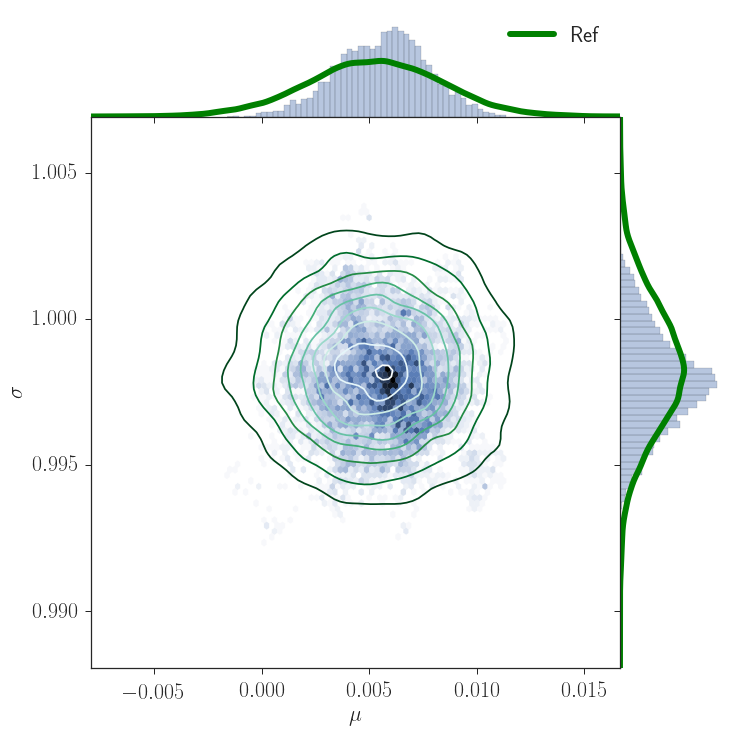

In [41]:
%run vanillaMCMC.py

In [38]:
L = []
for samples in samples_rwmh:
    L.append(samples)

In [39]:
len(L)

4

In [41]:
mh = sum(L)/4

In [42]:
len(samples_ula)

4

In [43]:
ula = sum(samples_ula)/4

In [46]:
len(mh)

10000

In [52]:
mala = sum(samples_mala)/4

In [47]:
ula

array([[ 1.44125466,  0.28411596],
       [ 1.39124707,  0.31269976],
       [ 1.35118428,  0.32969947],
       ..., 
       [ 0.00529313, -0.00239821],
       [ 0.00550342, -0.00237163],
       [ 0.00546569, -0.00245718]])

In [48]:
len(ula)

10000

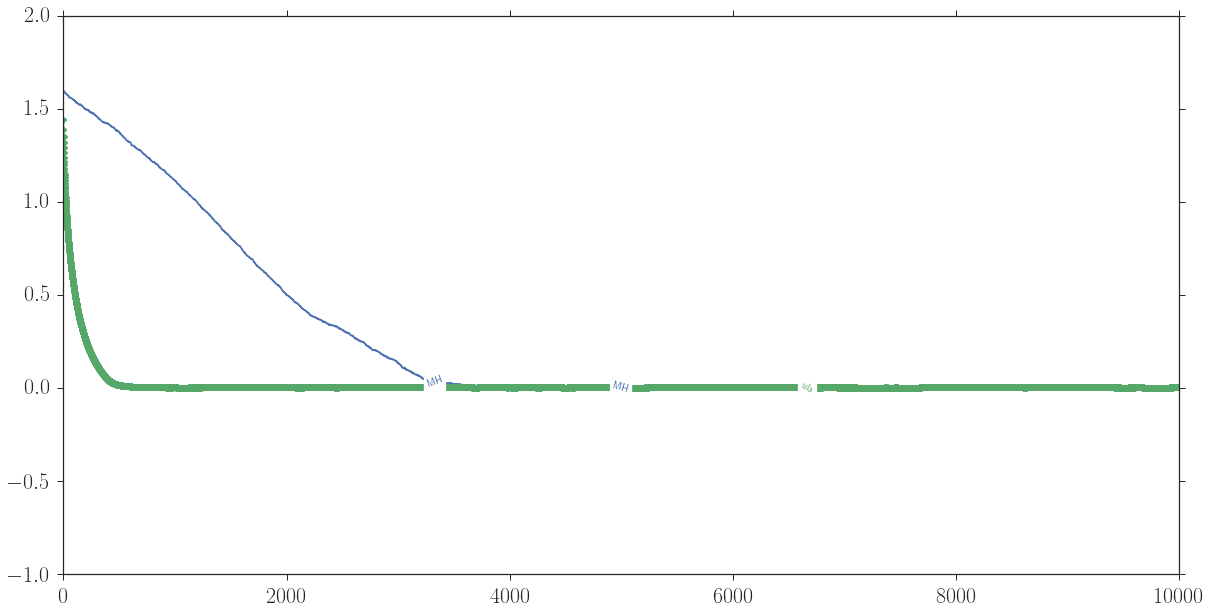

In [51]:
plt.figure(figsize=(20,10))
plt.plot(mh[:,0], '-',label=str('MH'))
labelLines(plt.gca().get_lines(),zorder=2.5)
plt.plot(ula[:,0], '-o',label=str('ula'))
labelLines(plt.gca().get_lines(),zorder=2.5)
plt.xlim([0, niters])
plt.ylim([-1, 2]);

(-1, 2)

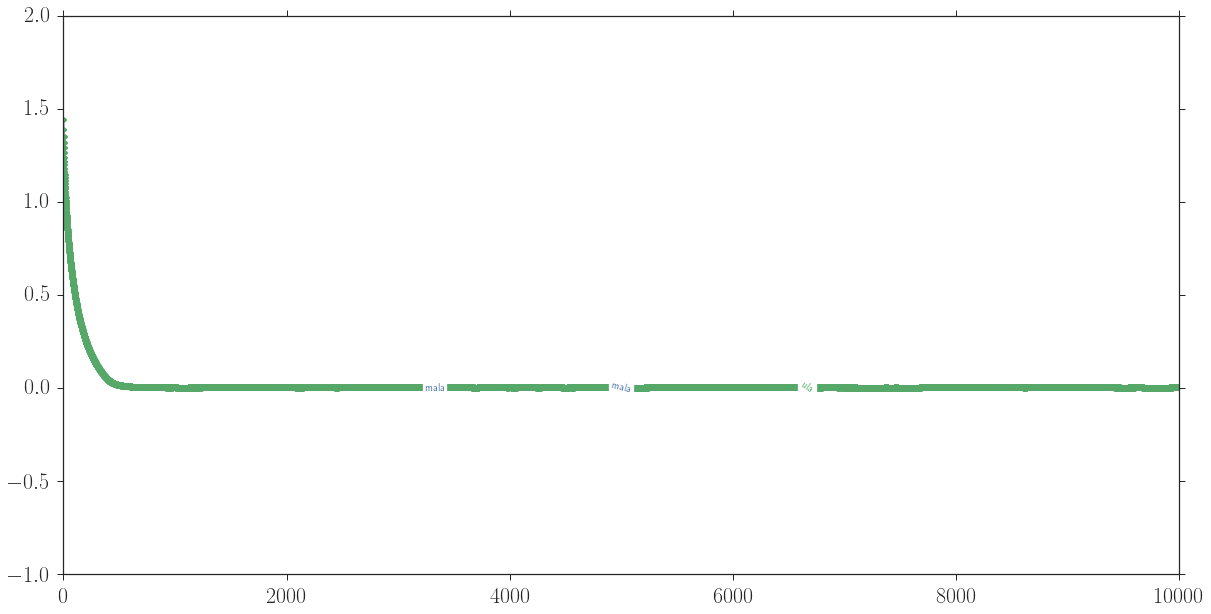

In [53]:
plt.figure(figsize=(20,10))
plt.plot(mala[:,0], '-',label=str('mala'))
labelLines(plt.gca().get_lines(),zorder=2.5)
plt.plot(ula[:,0], '-o',label=str('ula'))
labelLines(plt.gca().get_lines(),zorder=2.5)
plt.xlim([0, niters])
plt.ylim([-1, 2]);